In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('sku_1.csv')
df

,Day,Month,Year,Region,Zone,Sales,Calender_Year
0,9,7,2015-16,Hyderabad,Mirpur Khas,11.76,2015
1,16,7,2015-16,Hyderabad,Badin,11.76,2015
2,31,7,2015-16,Sukkur,Nawab Shah,11.76,2015
3,25,7,2015-16,Multan,Bahawalpur,23.52,2015
4,30,7,2015-16,Hyderabad,Badin,23.52,2015
...,...,...,...,...,...,...,...
52477,22,3,2020-21,Sukkur,Islamabad,1764.00,2021
52478,31,3,2020-21,Hyderabad,Hyderabad,1775.76,2021
52479,6,3,2020-21,Multan,Multan,2175.60,2021
52480,6,3,2020-21,Sukkur,Islamabad,2352.00,2021


# Visualization and Analysis

In [9]:
print("Total no of regions: {}".format(len(df.Region.unique())))

Total no of regions: 6


In [11]:
print(df.Region.unique()) #unique regions 

['Hyderabad' 'Sukkur' 'Multan' 'Karachi' 'Faisalabad' 'Islamabad']


## Selecting 1 region ==> Karachi

In [13]:
df= df[df['Region'] == 'Karachi']
df

,Day,Month,Year,Region,Zone,Sales,Calender_Year
5,31,7,2015-16,Karachi,Karachi North,23.52,2015
74,31,7,2015-16,Karachi,Karachi West,117.60,2015
388,9,8,2015-16,Karachi,Karachi North,11.76,2015
389,9,8,2015-16,Karachi,Karachi East,11.76,2015
390,9,8,2015-16,Karachi,Karachi East,11.76,2015
...,...,...,...,...,...,...,...
52442,5,3,2020-21,Karachi,Karachi,58.80,2021
52451,4,3,2020-21,Karachi,Zone E-Khi,176.40,2021
52457,8,3,2020-21,Karachi,Zone D-Khi,223.44,2021
52462,15,3,2020-21,Karachi,Zone D-Khi,294.00,2021


In [15]:
#dropping the Year column
df = df.drop(columns = ['Year'],axis = 0)

In [16]:
df

,Day,Month,Region,Zone,Sales,Calender_Year
5,31,7,Karachi,Karachi North,23.52,2015
74,31,7,Karachi,Karachi West,117.60,2015
388,9,8,Karachi,Karachi North,11.76,2015
389,9,8,Karachi,Karachi East,11.76,2015
390,9,8,Karachi,Karachi East,11.76,2015
...,...,...,...,...,...,...
52442,5,3,Karachi,Karachi,58.80,2021
52451,4,3,Karachi,Zone E-Khi,176.40,2021
52457,8,3,Karachi,Zone D-Khi,223.44,2021
52462,15,3,Karachi,Zone D-Khi,294.00,2021


In [17]:
#dropping the region column of karachi, as it is acting as a constant value
df = df.drop(columns = ['Region'],axis = 0)
df

,Day,Month,Zone,Sales,Calender_Year
5,31,7,Karachi North,23.52,2015
74,31,7,Karachi West,117.60,2015
388,9,8,Karachi North,11.76,2015
389,9,8,Karachi East,11.76,2015
390,9,8,Karachi East,11.76,2015
...,...,...,...,...,...
52442,5,3,Karachi,58.80,2021
52451,4,3,Zone E-Khi,176.40,2021
52457,8,3,Zone D-Khi,223.44,2021
52462,15,3,Zone D-Khi,294.00,2021


In [20]:
print("Total zones in Karachi city are: {}".format(df.Zone.unique().shape[0]))

Total zones in Karachi city are: 13


In [21]:
df['Calender_Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [22]:
for c in df['Calender_Year'].unique():
    print("Samples for year {} is {}".format(c,df[df['Calender_Year']==c].shape[0]))

Samples for year 2015 is 318
Samples for year 2016 is 875
Samples for year 2017 is 938
Samples for year 2018 is 974
Samples for year 2019 is 1142
Samples for year 2020 is 1060
Samples for year 2021 is 142


The total samples quantity for each year is greater then 313 days, because it can be of sales in differnt regions of a particular city per day simultaneosly.

In [29]:
df.isnull().any() #checking any null samples existence

Day              False
Month            False
Zone             False
Sales            False
Calender_Year    False
dtype: bool

In [52]:
#merging the DAY, MONTH and CALENDER_YEAR column into a datetime column
temp_df = []
for year,month,day in zip(df['Calender_Year'],df['Month'],df['Day']):
    temp_df.append('{}-{}-{}'.format(year,month,day)) #merging the year, month and day

df['Sales_date'] = temp_df #assinging the dates into a new column
df['Sales_date'] = pd.to_datetime(df['Sales_date'])
df

,Day,Month,Zone,Sales,Calender_Year,Sales_date
5,31,7,Karachi North,23.52,2015,2015-07-31
74,31,7,Karachi West,117.60,2015,2015-07-31
388,9,8,Karachi North,11.76,2015,2015-08-09
389,9,8,Karachi East,11.76,2015,2015-08-09
390,9,8,Karachi East,11.76,2015,2015-08-09
...,...,...,...,...,...,...
52442,5,3,Karachi,58.80,2021,2021-03-05
52451,4,3,Zone E-Khi,176.40,2021,2021-03-04
52457,8,3,Zone D-Khi,223.44,2021,2021-03-08
52462,15,3,Zone D-Khi,294.00,2021,2021-03-15


In [53]:
df.dtypes #again checking data types of all columns

Day                       int64
Month                     int64
Zone                     object
Sales                   float64
Calender_Year             int64
Sales_date       datetime64[ns]
dtype: object

In [54]:
df = df.drop(columns = ['Day','Month','Calender_Year'], 
            axis = 0)
df

,Zone,Sales,Sales_date
5,Karachi North,23.52,2015-07-31
74,Karachi West,117.60,2015-07-31
388,Karachi North,11.76,2015-08-09
389,Karachi East,11.76,2015-08-09
390,Karachi East,11.76,2015-08-09
...,...,...,...
52442,Karachi,58.80,2021-03-05
52451,Zone E-Khi,176.40,2021-03-04
52457,Zone D-Khi,223.44,2021-03-08
52462,Zone D-Khi,294.00,2021-03-15


In [56]:
df.set_index('Sales_date',inplace = True)
df

,Zone,Sales
Sales_date,,
2015-07-31,Karachi North,23.52
2015-07-31,Karachi West,117.60
2015-08-09,Karachi North,11.76
2015-08-09,Karachi East,11.76
2015-08-09,Karachi East,11.76
...,...,...
2021-03-05,Karachi,58.80
2021-03-04,Zone E-Khi,176.40
2021-03-08,Zone D-Khi,223.44


In [62]:
#label encoding the categorical data
zone = []
label = 0.0
for z in df['Zone'].unique():
    if z not in zone:
        df['Zone'] = df['Zone'].replace(z,label)
        label += 1

In [63]:
df

,Zone,Sales
Sales_date,,
2015-07-31,0.0,23.52
2015-07-31,1.0,117.60
2015-08-09,0.0,11.76
2015-08-09,2.0,11.76
2015-08-09,2.0,11.76
...,...,...
2021-03-05,12.0,58.80
2021-03-04,10.0,176.40
2021-03-08,7.0,223.44


In [64]:
df['Zone'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [74]:
df = df.sort_index()
df

,Zone,Sales
Sales_date,,
2015-07-31,0.0,23.52
2015-07-31,1.0,117.60
2015-08-03,2.0,246.96
2015-08-03,2.0,105.84
2015-08-04,2.0,705.60
...,...,...
2021-03-10,11.0,23.52
2021-03-15,7.0,294.00
2021-03-15,11.0,11.76


<AxesSubplot:xlabel='Sales_date'>

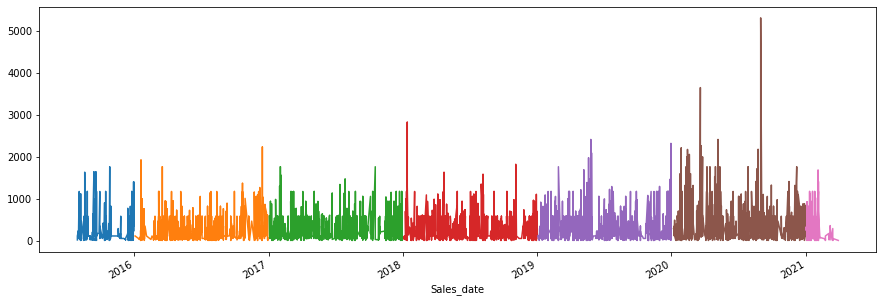

In [102]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(nrows= 1,ncols = 1)
df['2015-07-31':'2015-12-31']['Sales'].plot(figsize = (15,5))
df['2016-01-01':'2016-12-31']['Sales'].plot(figsize = (15,5))
df['2017-01-01':'2017-12-31']['Sales'].plot(figsize = (15,5))
df['2018-01-01':'2018-12-31']['Sales'].plot(figsize = (15,5))
df['2019-01-01':'2019-12-31']['Sales'].plot(figsize = (15,5))
df['2020-01-01':'2020-12-31']['Sales'].plot(figsize = (15,5))
df['2021-01-01':'2021-12-31']['Sales'].plot(figsize = (15,5))

<AxesSubplot:title={'center':'Year 2015'}, xlabel='Sales_date'>

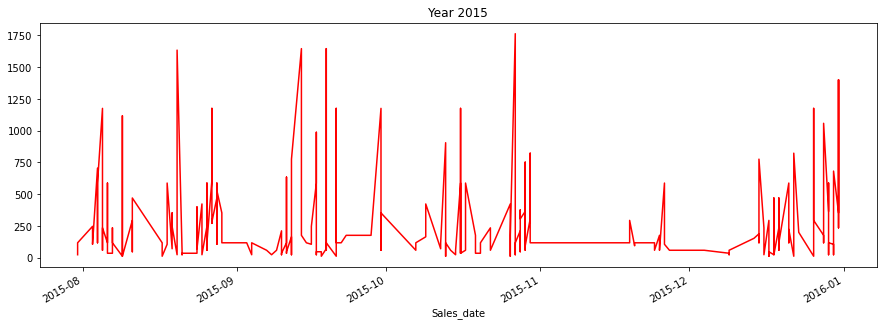

In [115]:
import matplotlib.pyplot as plt
#fig,axes = plt.subplots(nrows= 7,ncols = 1)
df['2015-07-31':'2015-12-31']['Sales'].plot(figsize = (15,5),title = 'Year 2015',color ='red')

<AxesSubplot:title={'center':'Year 2016'}, xlabel='Sales_date'>

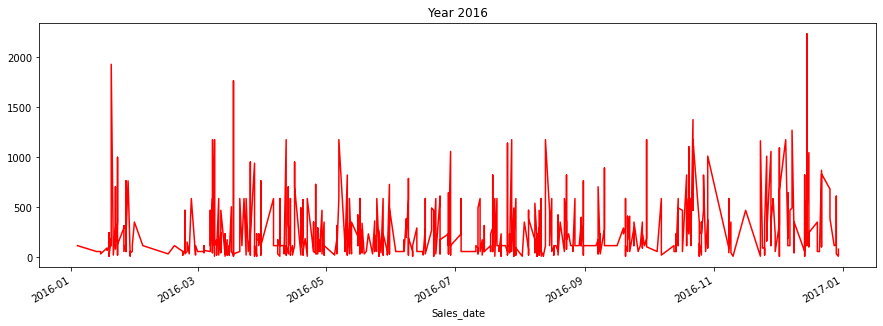

In [114]:

df['2016-01-01':'2016-12-31']['Sales'].plot(figsize = (15,5),title = 'Year 2016',color ='red')

<AxesSubplot:title={'center':'Year 2017'}, xlabel='Sales_date'>

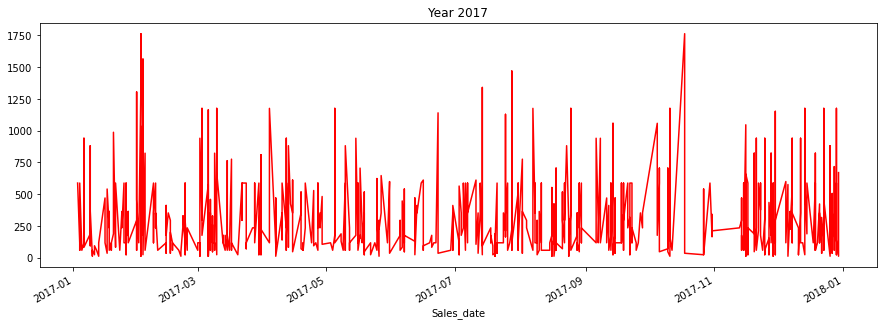

In [113]:

df['2017-01-01':'2017-12-31']['Sales'].plot(figsize = (15,5),title = 'Year 2017',color ='red')

<AxesSubplot:title={'center':'Year 2018'}, xlabel='Sales_date'>

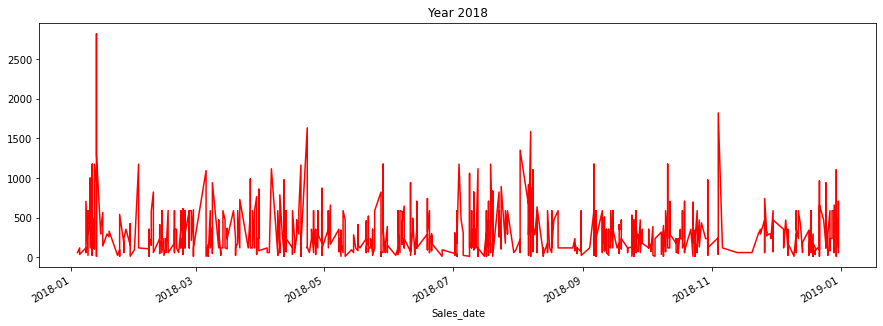

In [112]:

df['2018-01-01':'2018-12-31']['Sales'].plot(figsize = (15,5),title = 'Year 2018',color ='red')

<AxesSubplot:title={'center':'Year 2019'}, xlabel='Sales_date'>

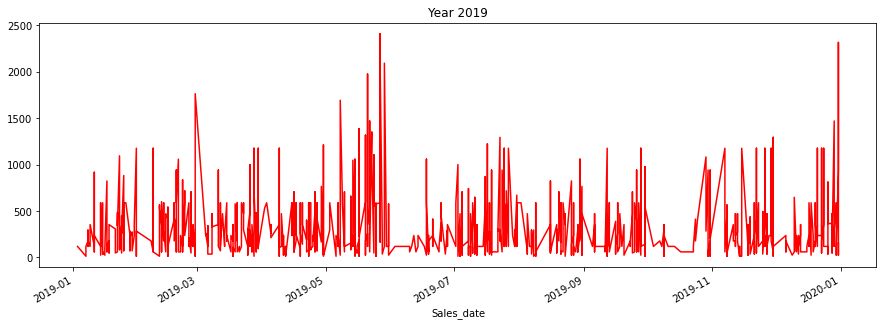

In [111]:

df['2019-01-01':'2019-12-31']['Sales'].plot(figsize = (15,5),title = 'Year 2019',color ='red')

<AxesSubplot:title={'center':'Year 2020'}, xlabel='Sales_date'>

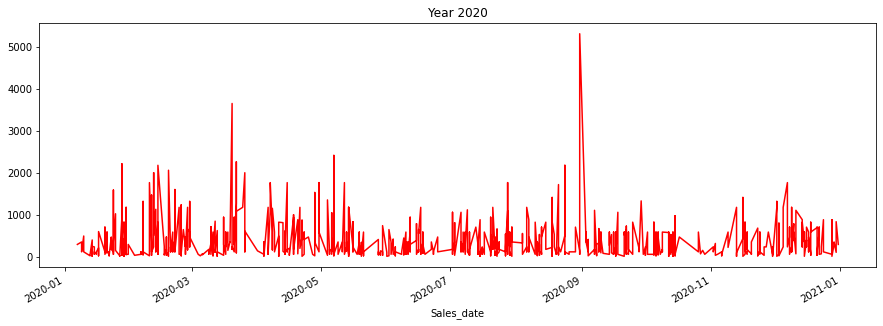

In [110]:

df['2020-01-01':'2020-12-31']['Sales'].plot(figsize = (15,5),title = 'Year 2020',color ='red')

<AxesSubplot:title={'center':'Year 2021'}, xlabel='Sales_date'>

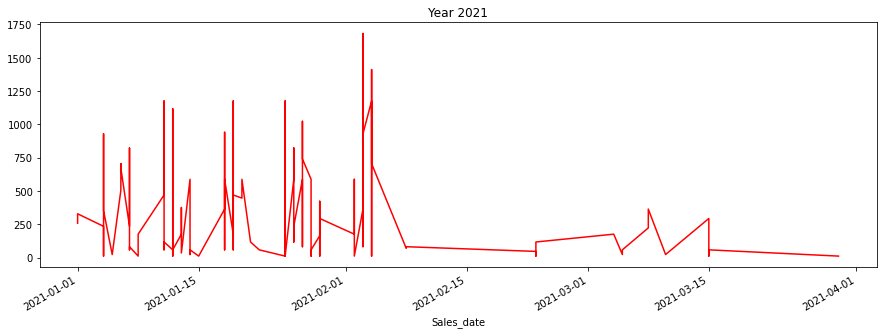

In [120]:

df['2021-01-01':'2021-03-30']['Sales'].plot(figsize = (15,5),title = 'Year 2021',color ='red')

### Testing, Is the Data is Stationary/Seasional or not?

In [121]:
from statsmodels.tsa.stattools import adfuller

In [128]:
# my hypothesis 
# Ho = non - sesional = null hypothesis
# h1 = sesional = alternate hypothese
def Check_Seasional(D,col):
    results = adfuller(D[col])
    label = ['ADF Test Statistic','p-value','#lags_used','# of obs']
    for r,l in zip(results,label):
        print(l,': ',r)
    if results[1] <= 0.05:
        print('Acc of p-value {}, it shows that the data is sesional'.format(results[1]))
    else:
        print('Acc of p-value {}, it shows that the data is not - sesional'.format(results[1]))
Check_Seasional(df,'Sales')

ADF Test Statistic :  -11.624279093167694
p-value :  2.3439861756681795e-21
#lags_used :  21
# of obs :  5427
Acc of p-value 2.3439861756681795e-21, it shows that the data is sesional


<b> Here, the algorithm shows the data is sesional </b><br>
<b> Therefore, there is no need to applying DIFFERENCING into the data. A technique to remove time dependence from the data </b>

### Auto-Correlation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

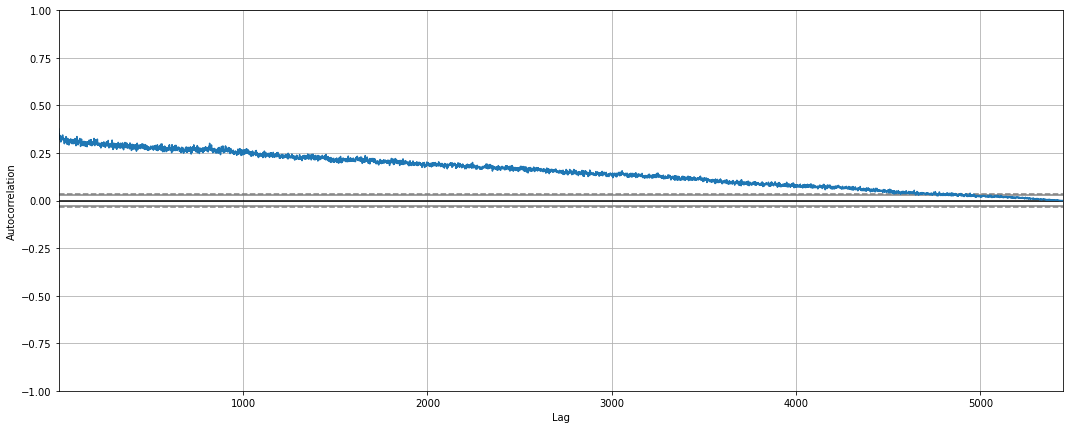

In [145]:
from pandas.plotting import autocorrelation_plot
fig = plt.figure(figsize = (18,7))
autocorrelation_plot(df)

In [146]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

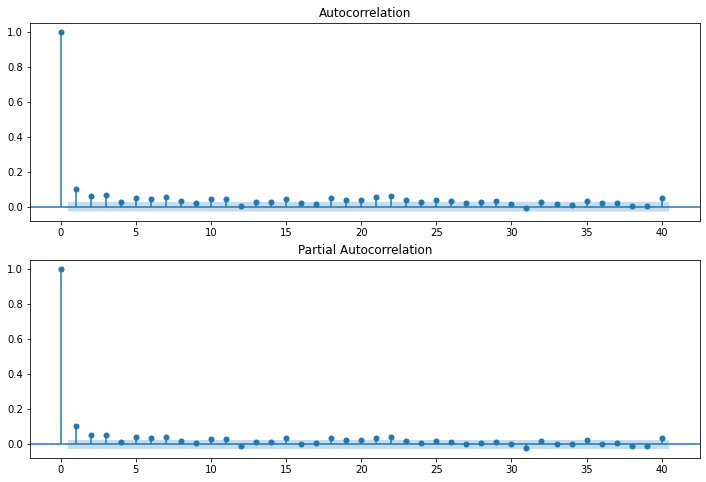

In [147]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Sales'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Sales'],lags=40,ax=ax2)